1.取数据表“crimeRatesByState2005”中 robbery和burglary两列数据绘制散点图，标题为robbery和burglary关联性散点图，并显示散点图图例。

In [1]:
import pandas as pd

with open('crimeRatesByState2005.csv', 'rb') as f:
    result = chardet.detect(f.read())

pr = pd.DataFrame(pd.read_csv('crimeRatesByState2005.csv', sep = ',', header=0, encoding=result['encoding']))
print("文件编码：" + result['encoding'])
pr

NameError: name 'chardet' is not defined

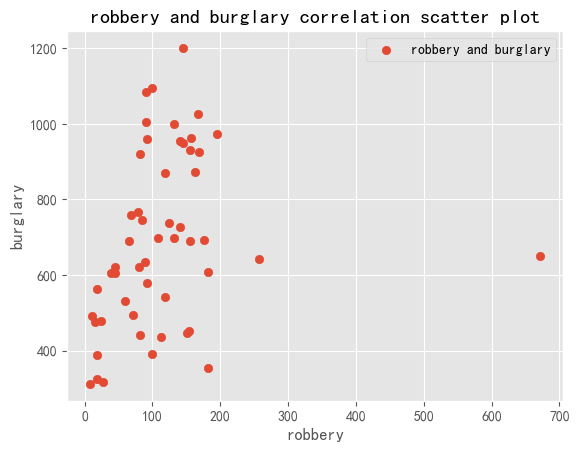

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pr['robbery'], pr['burglary'])
plt.title('robbery and burglary correlation scatter plot')
plt.xlabel('robbery')
plt.ylabel('burglary')

plt.legend(['robbery and burglary'])

plt.show()

2.利用“crimeRatesByState2005”中的数据，完成散点矩阵图的绘制。

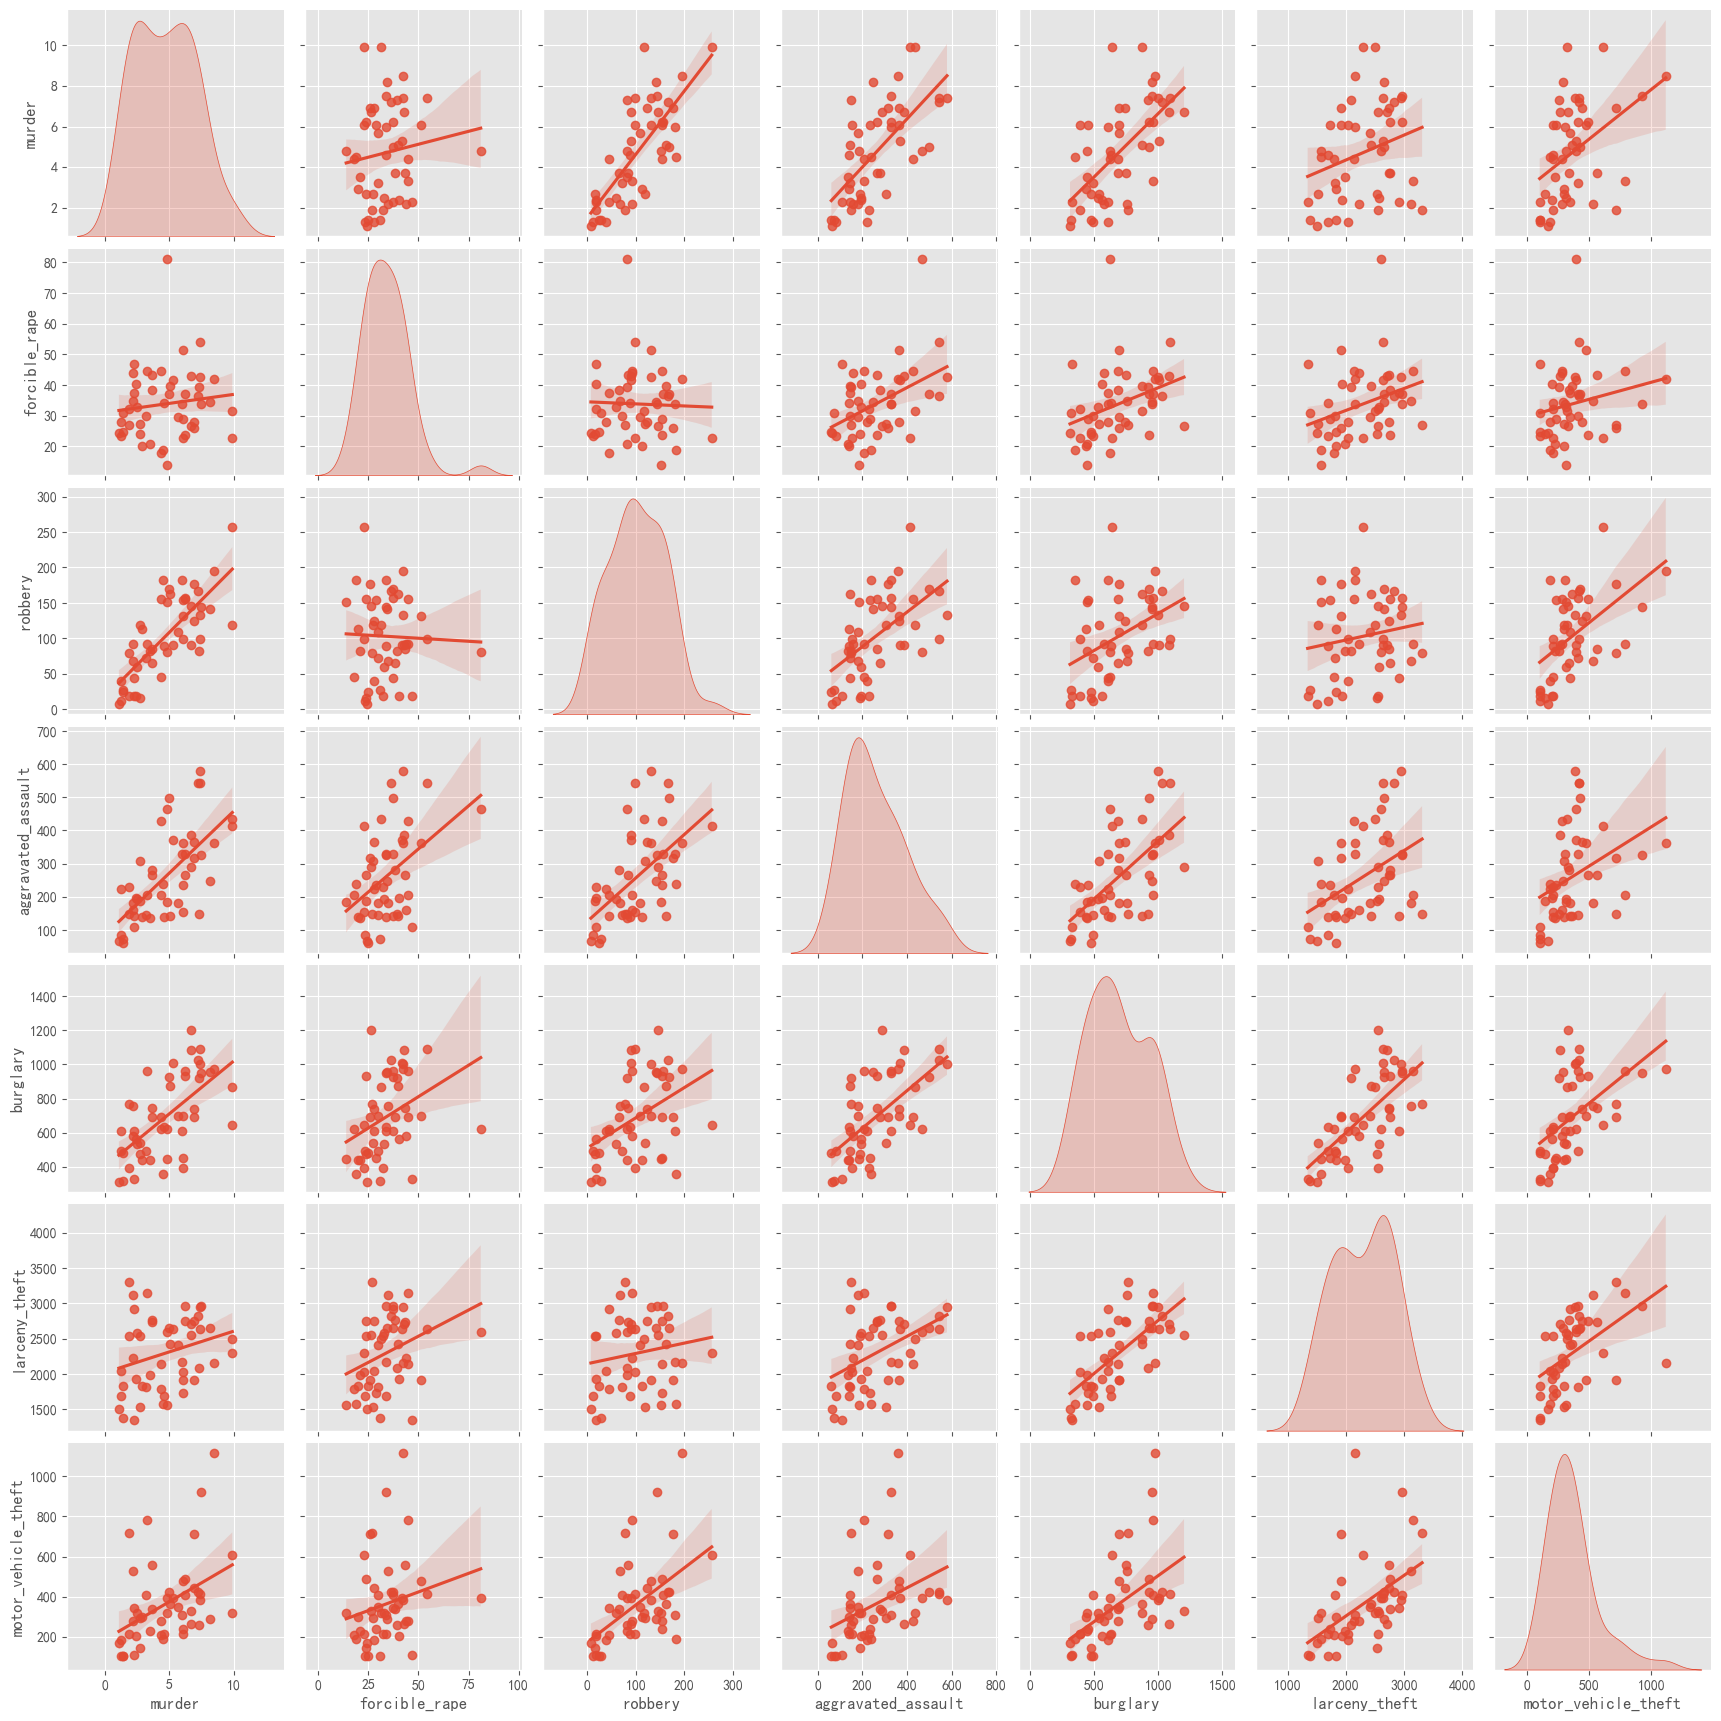

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#读取数据
crime=pd.read_csv("crimeRatesByState2005.csv")
#去除掉state为United States的数据
crime2 = crime[crime.state != "United States"]
#去除掉state为District of Columbia的数据
crime2 = crime2[crime2.state != "District of Columbia"]
#删除state列
crime2=crime2.drop(['state'],axis=1)
#删除population列
crime2=crime2.drop(['population'],axis=1)
#绘制成对关系图
g = sns.pairplot(crime2, diag_kind="kde",kind="reg")
plt.show()#显示图表

3.利用气泡图可视化方式探索larceny_theft 和motor_vehicle_theft 两种犯罪率是否与所在地区的人口数量有关系，分别绘制不显示、显示部分，显示全部气泡的state名称的三种气泡图。

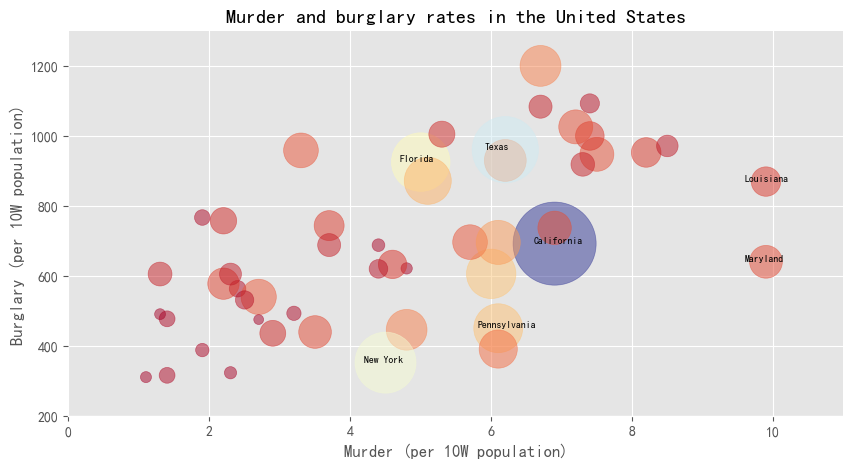

In [52]:
import matplotlib.pyplot as plt
import pandas  as pd
import  numpy as np
# plt.rcParams['font.sans-serif'] = ['WenQuanYi Mico Hei'] # 解决中文不能正常显示的问题
crime=pd.read_csv("crimeRatesByState2005.csv")
crime2 = crime[crime.state != "United States"] # 排除state为United States的这一行
crime2 = crime2[crime2.state != "District of Columbia"] # 排除state为District of Columbia这一行
z = list(crime2.population/10000)#取人口数作为气泡的大小的参考
colors = np.random.rand(len(list(crime2.murder)))#根据谋杀率取颜色
fig,ax=plt.subplots(figsize=(10,5))#创建画布
ax.scatter(list(crime2.murder), list(crime2.burglary), s=z,c=z,cmap=cm, linewidth=0.5, alpha=0.5)#绘制气泡图


# 图形不支持中文显示
ax.set(xlim=(0,11),ylim=(200,1300),\
       xlabel="Murder (per 10W population)",\
       ylabel="Burglary (per 10W population)",\
       title="Murder and burglary rates in the United States")#设置标签、标题的格式

# 特殊处理state，只显示部分地方
state_show = []
#遍历各州的数据
for sta in list(crime2.state):
    if(sta == 'California'or
    sta == 'Florida' or
    sta == 'Texas' or
    sta == 'New York' or
    sta == 'Pennsylvania' or
    sta == 'Louisiana' or
    sta == 'Maryland'):
        state_show.append(sta)
    else:
        state_show.append('')

# 显示所有气泡的state名称
#for i,j,k in zip(crime2.murder,crime2.burglary,crime2.state):
for i, j, k in zip(crime2.murder, crime2.burglary, state_show):
    plt.text(x=i-0.3,y=j-0.1,s=k,fontsize=7)
ax.spines["top"].set_visible(False)#不显示上边框
ax.spines["left"].set_visible(False)#不显示下边框
ax.spines["right"].set_visible(False)#不显示右边框
plt.show()#显示图表

4.分别将中国、日本从1960-2008年出生率变化绘制为茎叶图。

In [53]:
import pandas as pd

with open('birth-rate.csv', 'rb') as f:
    result = chardet.detect(f.read())

br = pd.DataFrame(pd.read_csv('birth-rate.csv', sep = ',', header=0, encoding=result['encoding']))
print("文件编码：" + result['encoding'])
br

文件编码：ascii


,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008
0,Aruba,36.400,35.179,33.863,32.459,30.994,29.513,28.069,26.721,25.518,...,15.024,14.528,14.041,13.579,13.153,12.772,12.441,12.159,11.919,11.716
1,Afghanistan,52.201,52.206,52.208,52.204,52.192,52.168,52.130,52.076,52.006,...,51.229,50.903,50.486,49.984,49.416,48.803,48.177,47.575,47.023,46.538
2,Angola,54.432,54.394,54.317,54.199,54.040,53.836,53.585,53.296,52.984,...,48.662,48.355,48.005,47.545,46.936,46.184,45.330,44.444,43.607,42.875
3,Albania,40.886,40.312,39.604,38.792,37.913,37.008,36.112,35.245,34.421,...,17.713,16.850,16.081,15.444,14.962,14.644,14.485,14.464,14.534,14.649
4,Netherlands Antilles,32.321,30.987,29.618,28.229,26.849,25.518,24.280,23.173,22.230,...,15.809,15.412,15.096,14.824,14.565,14.309,14.051,13.790,13.532,13.281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Samoa,48.202,47.788,47.226,46.491,45.591,44.558,43.447,42.331,41.270,...,31.504,31.113,30.462,29.612,28.631,27.563,26.464,25.391,24.391,23.508
230,"Yemen, Rep.",54.501,54.516,54.563,54.645,54.761,54.914,55.100,55.310,55.530,...,41.322,40.407,39.624,38.973,38.445,38.025,37.686,37.393,37.107,36.795
231,South Africa,42.267,41.993,41.610,41.112,40.520,39.883,39.268,38.734,38.317,...,24.899,24.684,24.458,24.199,23.897,23.550,23.167,22.770,22.387,22.038
232,Zambia,48.112,48.323,48.533,48.734,48.915,49.061,49.156,49.195,49.175,...,45.048,45.010,44.907,44.755,44.566,44.340,44.067,43.737,43.341,42.879


In [54]:
from itertools import groupby

#去除掉空值
br.dropna(subset=[ '2008'], inplace= True)
dirt={}
data = list(round(br ['2008'],1))#转换数据
rangenum = []

# 先把数据排序，再根据值进行分布，进行取余取商运算
for k,g in groupby(sorted(data),key = lambda x: int(x)):
    lst = map(str,list(map(lambda y: divmod(int(y*10),10)[1],list(g))))
    dirt[k] = ' '.join(lst)
    rangenum.append(k)
num = list(range(rangenum[0],rangenum[-1],2))

for i in num:
    a =''
    for k in sorted(dirt.keys()):
        if 0<=k-i <=1:
            a = a +' ' + dirt[k]
        elif k-i > 1:
            break

    print(str(i).rjust(5), '|', a)

    8 |  2 3 7 1 3 3 4 4 6 8 9 9 9
   10 |  0 1 2 2 3 4 5 5 5 6 6 9 9 9 0 0 1 2 2 2 2 3 4 5 5 5 7 7 7 8 8 9
   12 |  0 0 0 1 1 1 1 1 3 5 6 7 8 9 9 9 3 7 8 9
   14 |  0 0 3 4 5 6 6 7 8 8 9 9 1 2 3 7
   16 |  2 2 7 7 7 9 1 2 3 6 7 7 8 8 9
   18 |  0 0 2 3 3 6 7 7 8 8 8 9 0 0 4 4 8
   20 |  0 0 2 4 4 4 5 6 8 8 9 1 2 4 5 5 6 7 9
   22 |  0 0 5 7 8 3 4 5 7 9
   24 |  1 1 4 5 6 6 7 7 7 7 1 3 4 7
   26 |  3 1 3 3 5 6 6 7
   28 |  0 1 4 9 9 9
   30 |  1 2 4 2 3 4
   32 |  1 4 4 9 0 6 9
   34 |  5 5 6 0 4 9
   36 |  8 8 9 0
   38 |  0 2 3 4 5 5 8 2 3 4 6 8
   40 |  2 3 1 2 5
   42 |  6 9 9
   44 |  1 7
   46 |  2 5 2
   48 | 
   50 | 
   52 |  5


5.为1970年各国出生率绘制合理的直方图。

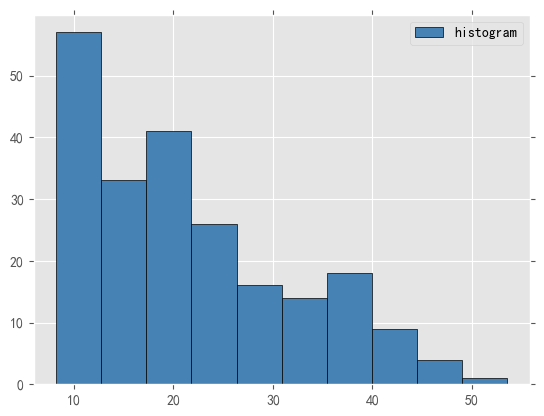

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决中文不能正常显示的问题
# plt.rcParams[ 'font.sans-serif'] = [ 'WenQuanYi Mico Hei']
# plt.rcParams[ 'axes.unicode_minus'] = False
#plt.rcParams['font.sans-serif'] = ['SimHei'] 
#读取数据
titanic = pd.read_csv( 'birth-rate.csv')
#去除空值
titanic.dropna(subset=[ '2008'], inplace= True)
plt.style.use( 'ggplot')
#绘制直方图
plt.hist(titanic['2008'], bins = 10, color = 'steelblue', edgecolor = 'k', label = "histogram")
plt.tick_params(top= 'off', right= 'off')#右侧，顶侧不显示刻度
plt.legend()#显示图例
plt.show()#显示图表

6.为2006年各国出生率绘制合理的密度图。

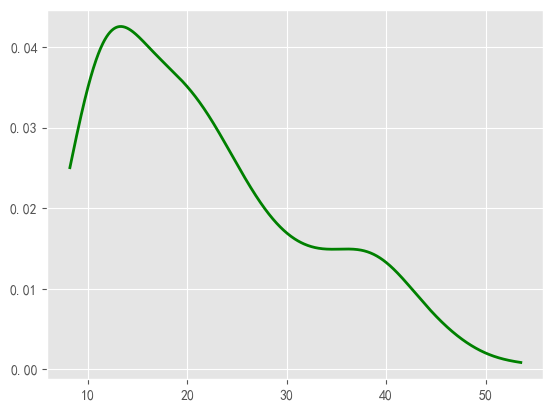

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# 解决中文乱码
# plt.rcParams[ 'font.sans-serif'] = [ 'WenQuanYi Mico Hei']
# plt.rcParams[ 'axes.unicode_minus'] = False

# 读取数据
titanic = pd.read_csv( 'birth-rate.csv')

# 去除空值
titanic.dropna(subset=[ '2008'], inplace= True)

# 使用kde密度图
kde = mlab.GaussianKDE(titanic['2008'])

#取最大值和最小值之间1000个均匀分割的数
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2,kde(x2), 'g-', linewidth = 2)#绘制折线图
plt.show()# 显示图表


7.将2006年各国出生率绘制为直方图，并将任务6中的密度图与直方图结合起来。

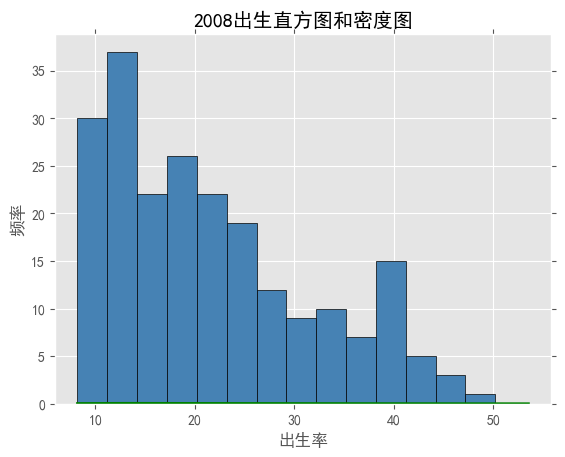

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文不能正常显示的问题
titanic = pd.read_csv('birth-rate.csv')

titanic.dropna(subset=['2008'], inplace=True)
plt.style.use('ggplot')
plt.hist(titanic['2008'], bins=np.arange(titanic['2008'].min(),
titanic['2008'].max(), 3),  color= 'steelblue', edgecolor='k')
plt.title('2008出生直方图和密度图')
plt.xlabel('出生率')
plt.ylabel('频率')

kde = mlab.GaussianKDE(titanic['2008'])
x2 = np.linspace(titanic['2008'].min(), titanic['2008'].max(), 1000)
line2 = plt.plot(x2, kde(x2), 'g-', linewidth=2)
plt.tick_params(top='off', right='off')

plt.show()